<a href="https://colab.research.google.com/github/josejulianhidayat/Analisis_Marketing_Campaign/blob/main/%5BClustering%5D_Model_DBSCAN_SilhouetteScore_dan_ElbowMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

**PENYELESAIAN**

1. Dataset yang digunakan harus tanpa label: Dataset yang diunggah memenuhi syarat karena tidak memiliki kolom target/kelas.

2. Jumlah baris minimal 1000 baris: Dataset ini memiliki 2240 baris, memenuhi kriteria jumlah baris.

3. Mengandung data kategorikal dan numerikal: Kolom kategorikal yang dapat digunakan: Education, Marital_Status. olom numerikal yang dapat digunakan: Income, Recency, dll.

4. Pembatasan: Dataset yang digunakan tidak berasal dari latihan sebelumnya Dataset ini baru diunggah dan memenuhi pembatasan tersebut.

Kesimpulan: Dataset sudah sesuai dengan kriteria keberhasilan untuk tahapan pengenalan dataset.

Kolom yang akan digunakan untuk analisis selanjutnya adalah:

Kategorikal: Education.
Numerikal: Income.
Langkah selanjutnya adalah mempersiapkan dataset untuk proses clustering.








# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [30]:
# Import pustaka untuk manipulasi data
import pandas as pd
import numpy as np

# Import pustaka untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import pustaka untuk preprocessing data
from sklearn.preprocessing import MinMaxScaler, RobustScaler, LabelEncoder

# Import pustaka untuk clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Import pustaka untuk klasifikasi (jika ada)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Menonaktifkan warning agar notebook lebih rapi
import warnings
warnings.filterwarnings("ignore")


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [31]:
# Memuat dataset ke dalam DataFrame
file_path = 'marketing_campaign.csv'  # Ganti dengan lokasi file dataset Anda
dataset = pd.read_csv(file_path, delimiter=';')

# Menampilkan informasi dataset
print("Informasi Dataset:")
print(dataset.info())

# Menampilkan 5 baris pertama dataset
print("\n5 Baris Pertama Dataset:")
print(dataset.head())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWine

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Beberapa Baris Pertama Dataset:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

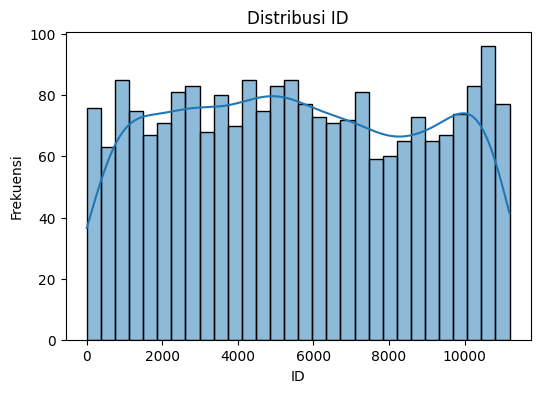

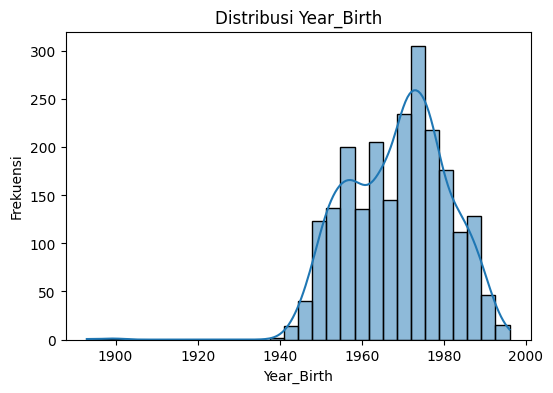

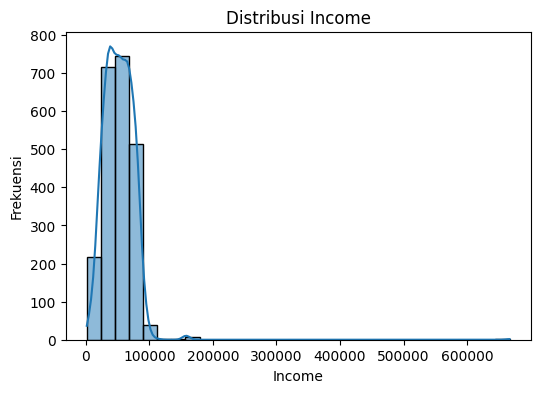

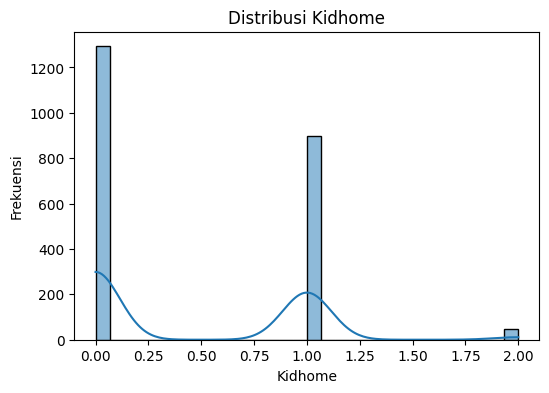

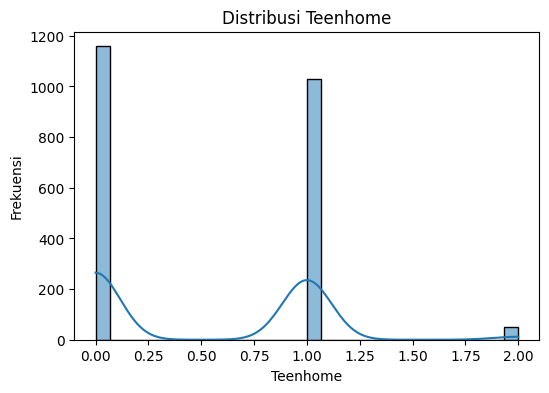

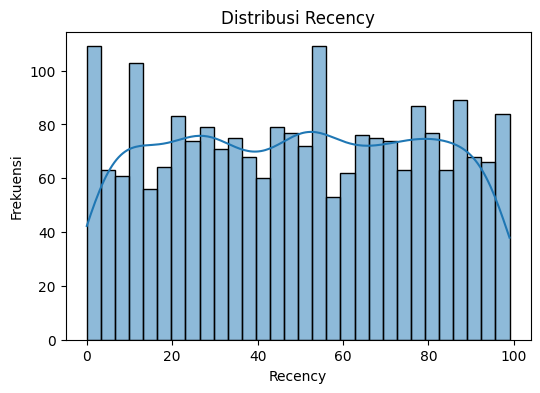

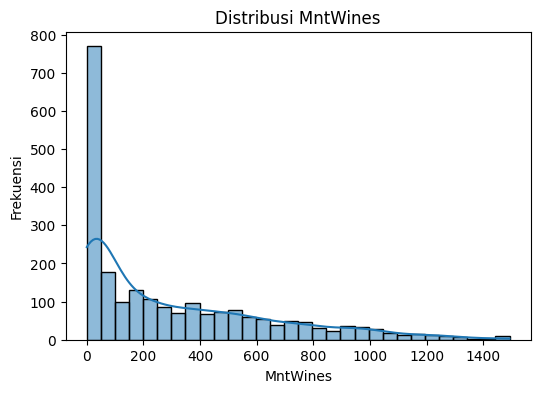

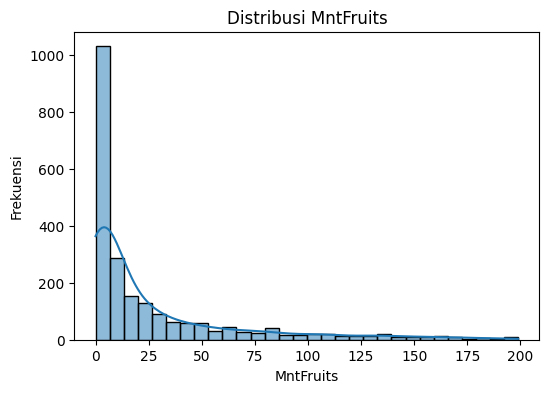

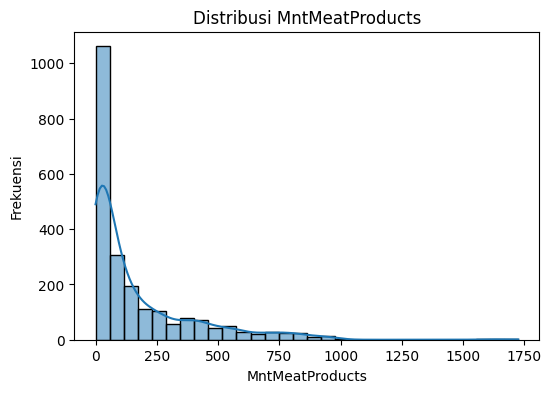

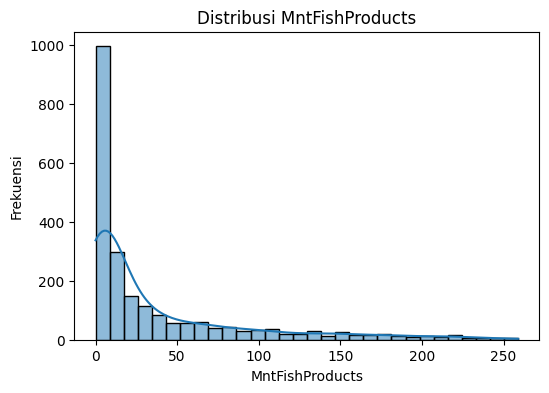

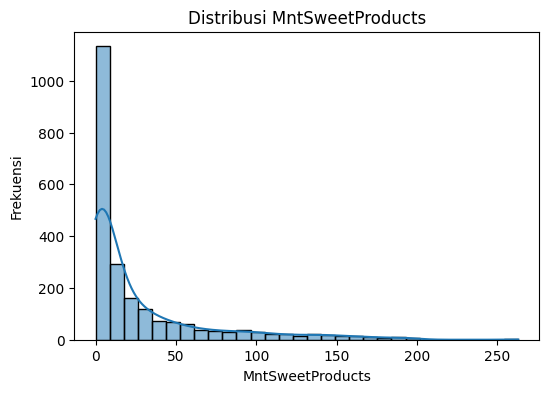

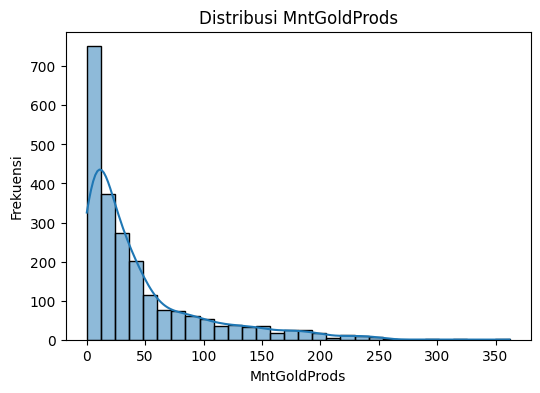

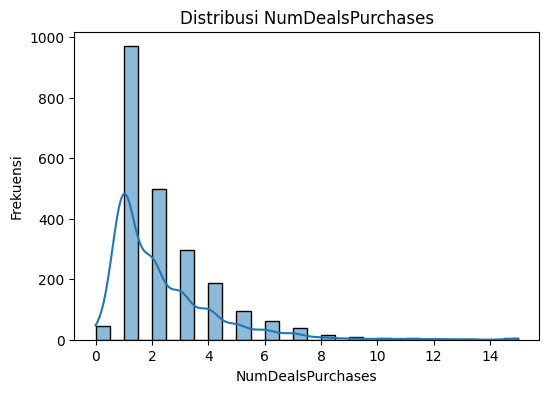

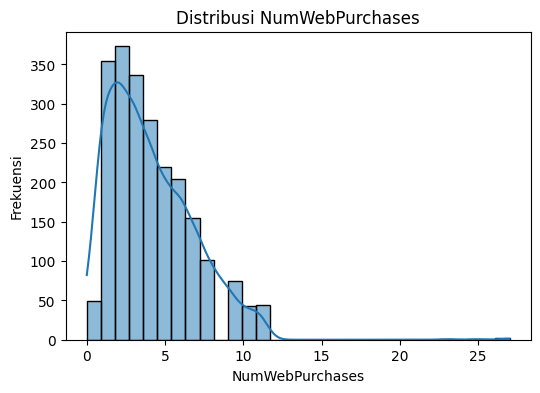

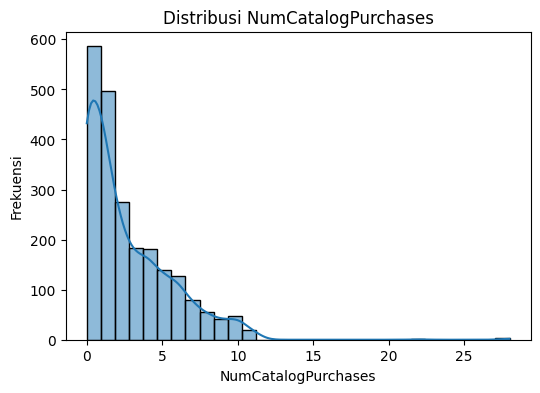

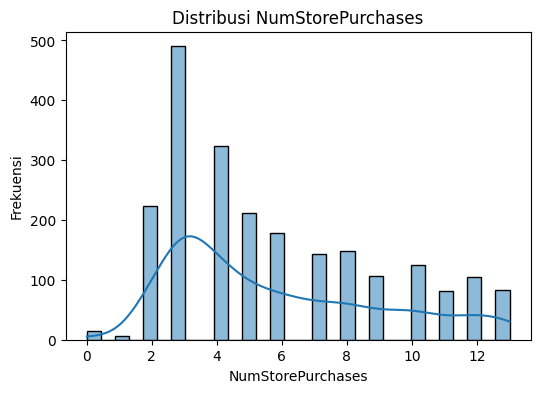

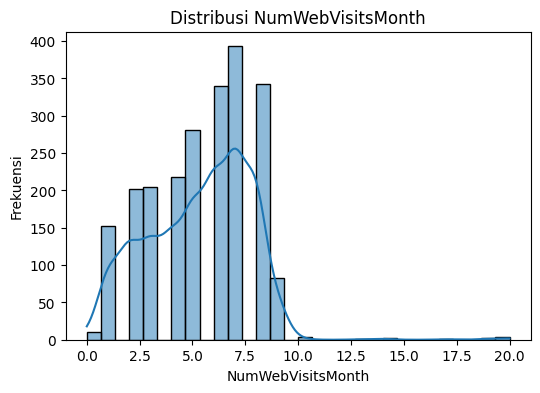

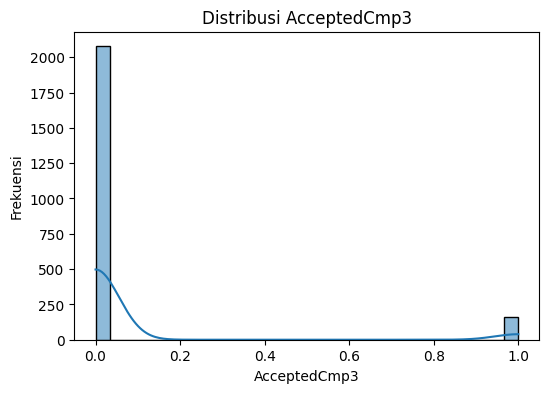

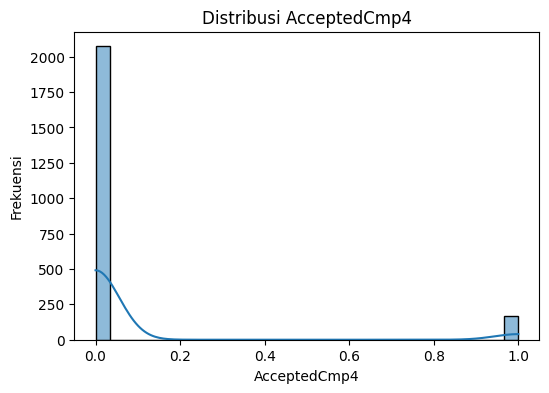

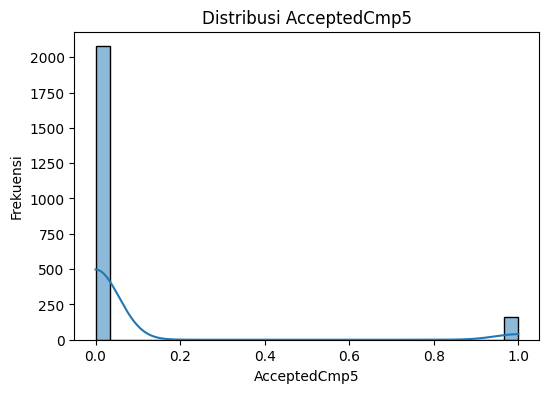

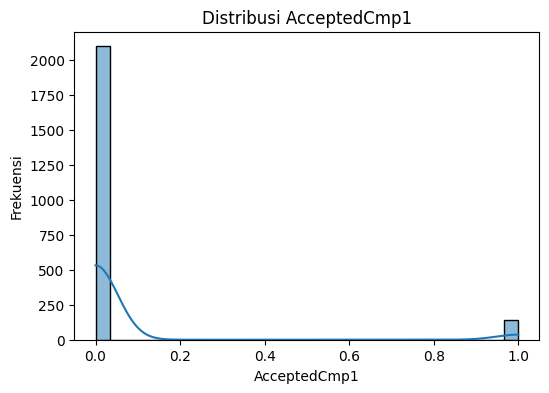

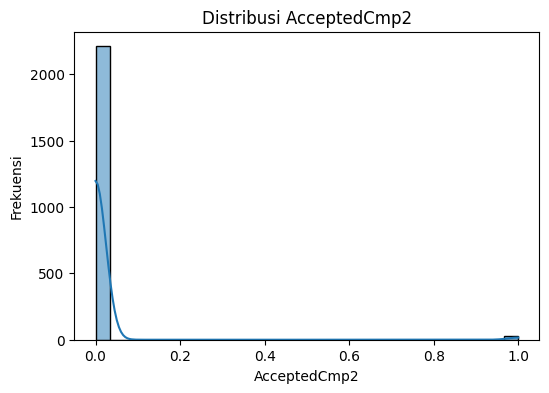

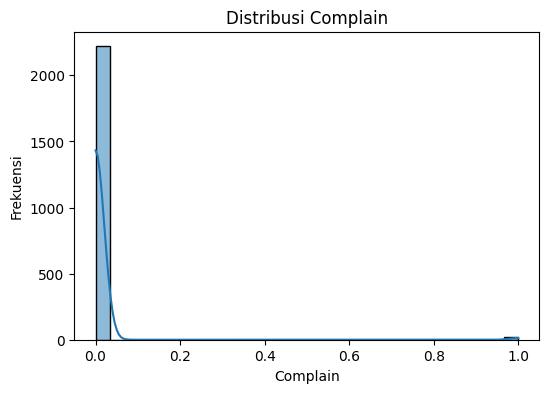

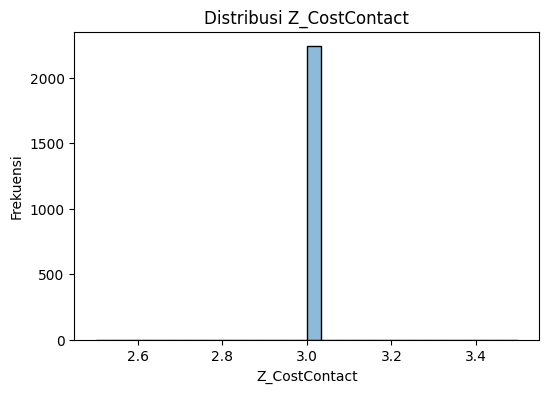

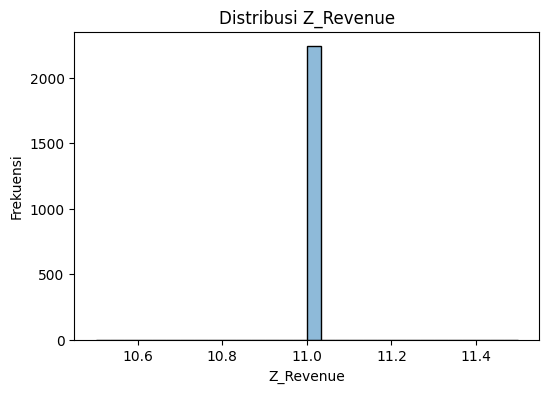

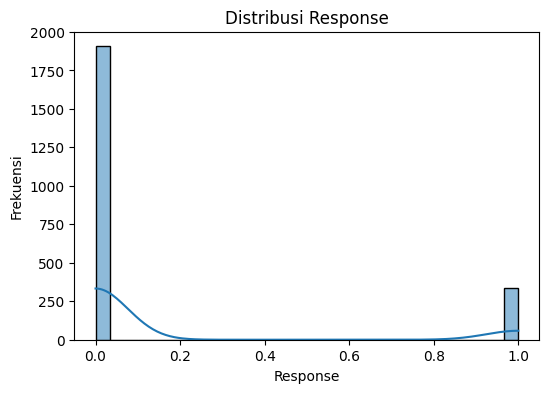

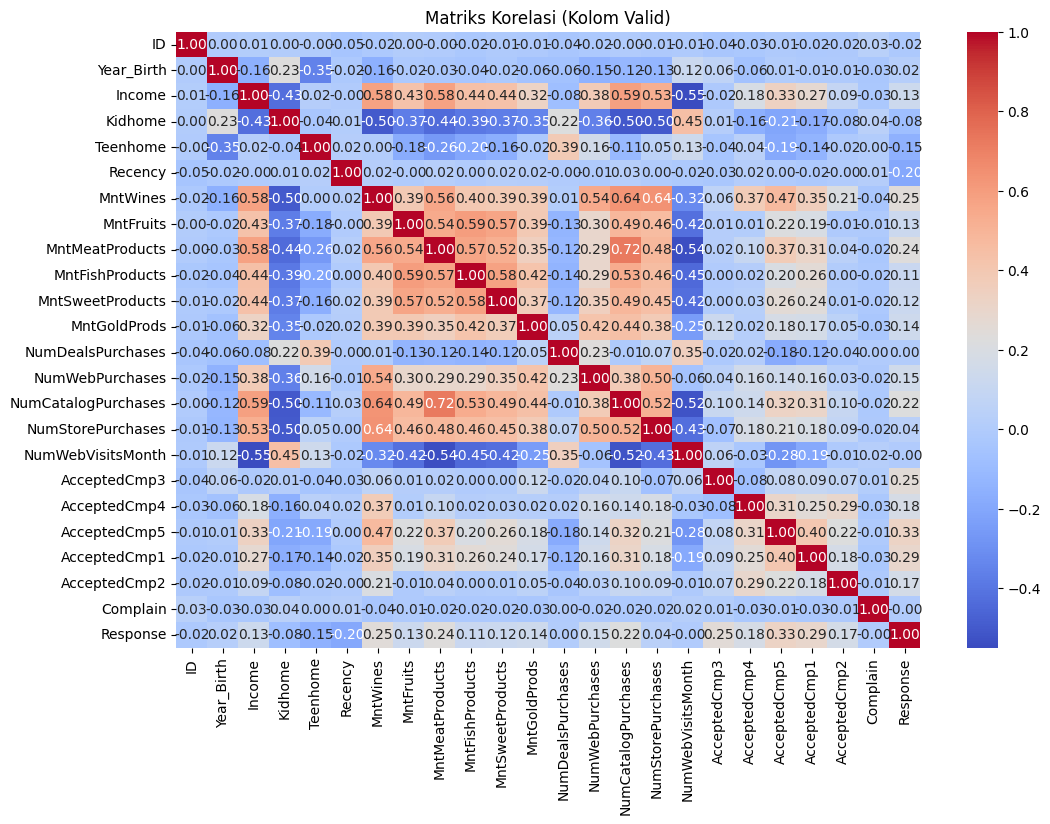

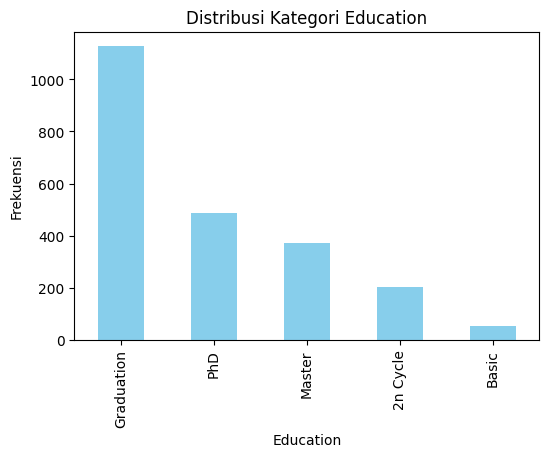

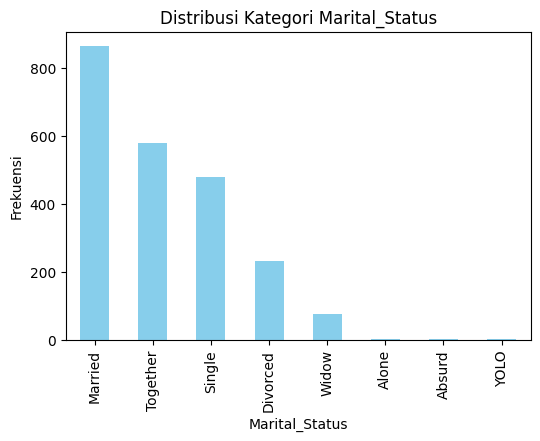


Kolom `Dt_Customer` memiliki terlalu banyak kategori (663). Menampilkan hanya 20 teratas.


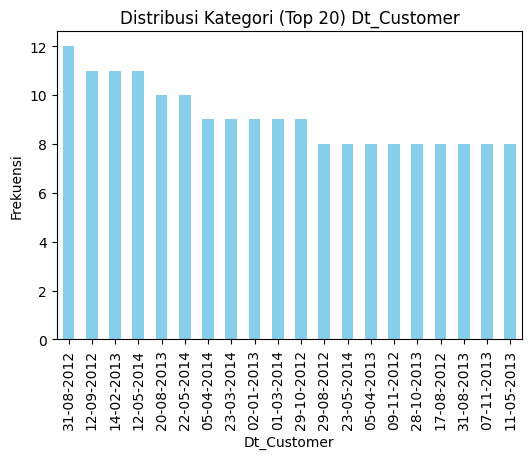

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
file_path = 'marketing_campaign.csv'  # Sesuaikan path jika diperlukan
dataset = pd.read_csv(file_path, delimiter='\t')

# Memastikan dataset terbaca dengan benar
print("Beberapa Baris Pertama Dataset:")
print(dataset.head())

# Informasi dataset
print("\nInformasi Dataset:")
print(dataset.info())

# 1. Memahami Struktur Data
print("\nJumlah Baris dan Kolom:")
print(dataset.shape)
print("\nJenis Data pada Setiap Kolom:")
print(dataset.dtypes)

# 2. Menangani Data yang Hilang
print("\nData yang Hilang pada Setiap Kolom:")
missing_values = dataset.isnull().sum()
print(missing_values)

# Mengisi nilai yang hilang pada kolom numerikal dengan mean
for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
    if missing_values[col] > 0:
        dataset[col].fillna(dataset[col].mean(), inplace=True)

# Mengisi nilai yang hilang pada kolom kategorikal dengan modus
for col in dataset.select_dtypes(include=['object']).columns:
    if missing_values[col] > 0:
        dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# 3. Analisis Distribusi dan Korelasi
# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(dataset.describe())

# Visualisasi Distribusi Numerikal (Histogram)
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# Matriks Korelasi
# Filter kolom numerikal
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Hapus kolom yang seluruh nilainya NaN
valid_numerical_cols = dataset[numerical_cols].dropna(axis=1, how='all').columns

# Hapus kolom dengan variansi nol (tidak ada variasi data)
valid_numerical_cols = [
    col for col in valid_numerical_cols if dataset[col].nunique() > 1
]

if valid_numerical_cols:  # Cek jika ada kolom valid yang tersisa
    # Hitung matriks korelasi hanya pada kolom valid
    correlation_matrix = dataset[valid_numerical_cols].corr()

    # Plot heatmap matriks korelasi
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Matriks Korelasi (Kolom Valid)")
    plt.show()
else:
    print("Tidak ada kolom numerikal valid untuk menghitung korelasi.")

# 4. Visualisasi Data Kategorikal
max_unique_values = 20  # Maksimal jumlah kategori yang divisualisasikan
categorical_cols = dataset.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_values = dataset[col].nunique()
    if unique_values > max_unique_values:
        print(f"\nKolom `{col}` memiliki terlalu banyak kategori ({unique_values}). Menampilkan hanya {max_unique_values} teratas.")
        top_categories = dataset[col].value_counts().nlargest(max_unique_values)
        plt.figure(figsize=(6, 4))
        top_categories.plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori (Top {max_unique_values}) {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()
    else:
        plt.figure(figsize=(6, 4))
        dataset[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [39]:
# Mengisi nilai kosong pada kolom numerikal dengan median
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numerical_cols] = dataset[numerical_cols].fillna(dataset[numerical_cols].median())
# Mengisi nilai kosong pada kolom kategorikal dengan modus
categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)


In [40]:
# Mengecek jumlah data duplikat
print("Jumlah data duplikat:", dataset.duplicated().sum())

# Menghapus data duplikat
dataset.drop_duplicates(inplace=True)


Jumlah data duplikat: 0


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])


In [42]:
for col in numerical_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data di luar batas
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    print(f"Jumlah outlier pada {col}: {outliers.shape[0]}")


Jumlah outlier pada ID: 0
Jumlah outlier pada Year_Birth: 3
Jumlah outlier pada Income: 8
Jumlah outlier pada Kidhome: 0
Jumlah outlier pada Teenhome: 0
Jumlah outlier pada Recency: 0
Jumlah outlier pada MntWines: 35
Jumlah outlier pada MntFruits: 227
Jumlah outlier pada MntMeatProducts: 175
Jumlah outlier pada MntFishProducts: 223
Jumlah outlier pada MntSweetProducts: 250
Jumlah outlier pada MntGoldProds: 207
Jumlah outlier pada NumDealsPurchases: 86
Jumlah outlier pada NumWebPurchases: 4
Jumlah outlier pada NumCatalogPurchases: 23
Jumlah outlier pada NumStorePurchases: 0
Jumlah outlier pada NumWebVisitsMonth: 8
Jumlah outlier pada AcceptedCmp3: 163
Jumlah outlier pada AcceptedCmp4: 167
Jumlah outlier pada AcceptedCmp5: 163
Jumlah outlier pada AcceptedCmp1: 144
Jumlah outlier pada AcceptedCmp2: 30
Jumlah outlier pada Complain: 21
Jumlah outlier pada Z_CostContact: 0
Jumlah outlier pada Z_Revenue: 0
Jumlah outlier pada Response: 334


In [43]:
dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]


In [48]:
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom kategorikal
categorical_cols = dataset.select_dtypes(include=['object']).columns

# Melakukan encoding untuk setiap kolom kategorikal
le = LabelEncoder()
for col in categorical_cols:
    dataset[col] = le.fit_transform(dataset[col])

# Periksa hasil encoding
print(dataset.head())


         ID  Year_Birth    Income  Kidhome  Teenhome   Recency  MntWines  \
1  0.194263    0.592233  0.067095      0.5       0.5  0.383838  0.007368   
2  0.370029    0.699029  0.105097      0.0       0.0  0.262626  0.285332   
3  0.552408    0.883495  0.037471      0.5       0.0  0.262626  0.007368   
4  0.475739    0.854369  0.085065      0.5       0.0  0.949495  0.115874   
5  0.665356    0.718447  0.091412      0.0       0.5  0.161616  0.348292   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Dt_Customer_635  \
1   0.005025         0.003478         0.007722  ...            False   
2   0.246231         0.073623         0.428571  ...            False   
3   0.020101         0.011594         0.038610  ...            False   
4   0.216080         0.068406         0.177606  ...            False   
5   0.211055         0.056812         0.000000  ...            False   

   Dt_Customer_636  Dt_Customer_637  Dt_Customer_638  Dt_Customer_639  \
1            False            False  

In [49]:
# One-Hot Encoding untuk kolom kategorikal
dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

# Periksa hasil encoding
print(dataset.head())


         ID  Year_Birth    Income  Kidhome  Teenhome   Recency  MntWines  \
1  0.194263    0.592233  0.067095      0.5       0.5  0.383838  0.007368   
2  0.370029    0.699029  0.105097      0.0       0.0  0.262626  0.285332   
3  0.552408    0.883495  0.037471      0.5       0.0  0.262626  0.007368   
4  0.475739    0.854369  0.085065      0.5       0.0  0.949495  0.115874   
5  0.665356    0.718447  0.091412      0.0       0.5  0.161616  0.348292   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Dt_Customer_635  \
1   0.005025         0.003478         0.007722  ...            False   
2   0.246231         0.073623         0.428571  ...            False   
3   0.020101         0.011594         0.038610  ...            False   
4   0.216080         0.068406         0.177606  ...            False   
5   0.211055         0.056812         0.000000  ...            False   

   Dt_Customer_636  Dt_Customer_637  Dt_Customer_638  Dt_Customer_639  \
1            False            False  

In [50]:
bins = [0, 18, 35, 50, 100]
labels = ['Remaja', 'Dewasa Muda', 'Dewasa', 'Lansia']
dataset['Age_Group'] = pd.cut(dataset['Year_Birth'], bins=bins, labels=labels)


In [51]:
from sklearn.decomposition import PCA

# Mengurangi dimensi dataset menjadi 2 atau 3 komponen utama
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(dataset.drop(columns=['Age_Group']))  # Hapus kolom kategorikal

# Simpan hasil PCA sebagai DataFrame baru
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])
print(pca_df.head())


        PC1       PC2       PC3
0  0.320859 -0.563279  0.924867
1  0.108664 -0.856169 -0.636031
2  0.067941 -0.835623 -0.375421
3 -0.269198  0.962386 -0.029615
4 -0.895338 -0.267681 -0.556622


In [52]:
from sklearn.preprocessing import LabelEncoder

# Encoding kolom Age_Group
le = LabelEncoder()
dataset['Age_Group'] = le.fit_transform(dataset['Age_Group'])


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [54]:
from sklearn.cluster import DBSCAN

# Membuat model DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])

# Tambahkan label cluster ke DataFrame
pca_df['Cluster'] = clusters

# Evaluasi Silhouette Score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2', 'PC3']], pca_df['Cluster'])
print(f"Silhouette Score (DBSCAN): {silhouette_avg}")


Silhouette Score (DBSCAN): 0.7048643361972962


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

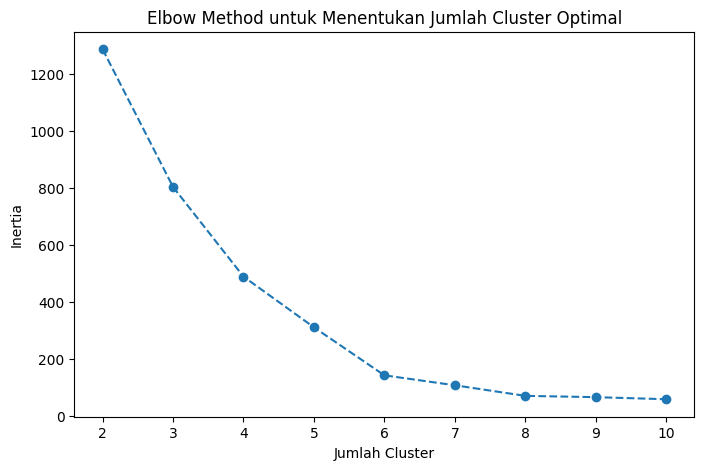

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menentukan inertia untuk jumlah cluster 2 hingga 10
inertias = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df[['PC1', 'PC2', 'PC3']])  # Gunakan kolom dari PCA
    inertias.append(kmeans.inertia_)

# Plot hasil Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o', linestyle='--')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan Jumlah Cluster Optimal")
plt.show()


Jumlah Cluster: 2, Silhouette Score: 0.3028182593539414
Jumlah Cluster: 3, Silhouette Score: 0.41323122690528086
Jumlah Cluster: 4, Silhouette Score: 0.5335572060303675
Jumlah Cluster: 5, Silhouette Score: 0.6078456715354472
Jumlah Cluster: 6, Silhouette Score: 0.7039133515245234
Jumlah Cluster: 7, Silhouette Score: 0.702391266785433
Jumlah Cluster: 8, Silhouette Score: 0.7188795702810127
Jumlah Cluster: 9, Silhouette Score: 0.6952694805138996
Jumlah Cluster: 10, Silhouette Score: 0.677931466850071


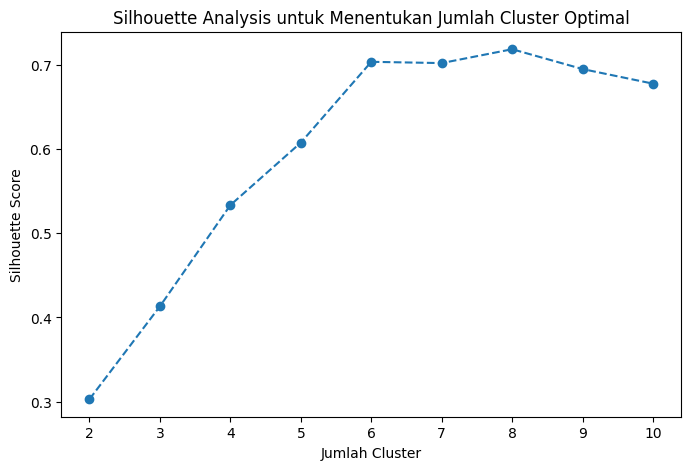

In [56]:
from sklearn.metrics import silhouette_score

# Menentukan Silhouette Score untuk jumlah cluster 2 hingga 10
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])
    score = silhouette_score(pca_df[['PC1', 'PC2', 'PC3']], labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {score}")

# Plot hasil Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis untuk Menentukan Jumlah Cluster Optimal")
plt.show()


In [58]:
from sklearn.cluster import KMeans

# Model K-Means dengan jumlah cluster optimal (8)
optimal_clusters = 8
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])

# Evaluasi ulang Silhouette Score untuk model akhir
from sklearn.metrics import silhouette_score
final_silhouette = silhouette_score(pca_df[['PC1', 'PC2', 'PC3']], pca_df['Cluster'])
print(f"Silhouette Score untuk Model Akhir: {final_silhouette}")


Silhouette Score untuk Model Akhir: 0.7188795702810127


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [63]:
from sklearn.feature_selection import VarianceThreshold

# Terapkan Variance Threshold
selector = VarianceThreshold(threshold=0.001)  # Sesuaikan threshold jika perlu
dataset_reduced = selector.fit_transform(dataset)

# Fitur terpilih
selected_features = dataset.columns[selector.get_support()]
print(f"Fitur setelah Variance Threshold: {selected_features}")

# Dataset hasil reduksi fitur
dataset_reduced = pd.DataFrame(dataset_reduced, columns=selected_features)


Fitur setelah Variance Threshold: Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       ...
       'Dt_Customer_633', 'Dt_Customer_634', 'Dt_Customer_635',
       'Dt_Customer_636', 'Dt_Customer_638', 'Dt_Customer_639',
       'Dt_Customer_640', 'Dt_Customer_641', 'Dt_Customer_643', 'Cluster'],
      dtype='object', length=536)


In [66]:
from sklearn.decomposition import PCA

# Reduksi dimensi dengan PCA
pca = PCA(n_components=3)  # Mulai dengan 3 komponen
reduced_data = pca.fit_transform(dataset.drop(columns=['Cluster'], errors='ignore'))

# Model clustering dengan data hasil PCA
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

# Evaluasi Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(reduced_data, clusters)

print(f"Silhouette Score setelah PCA: {silhouette_avg}")


Silhouette Score setelah PCA: 0.718881878927239


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

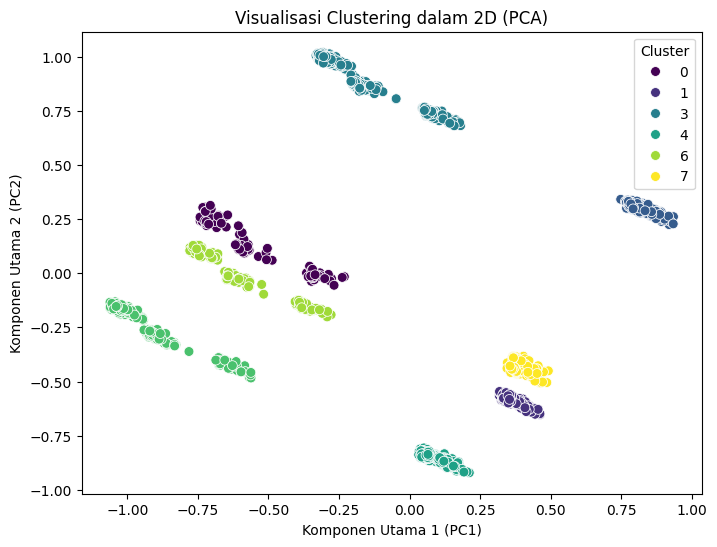

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot 2D untuk hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_data[:, 0],  # Komponen pertama (PC1)
    y=reduced_data[:, 1],  # Komponen kedua (PC2)
    hue=clusters,          # Label cluster
    palette='viridis',     # Palet warna
    s=50                   # Ukuran marker
)
plt.title("Visualisasi Clustering dalam 2D (PCA)")
plt.xlabel("Komponen Utama 1 (PC1)")
plt.ylabel("Komponen Utama 2 (PC2)")
plt.legend(title="Cluster", loc="best")
plt.show()


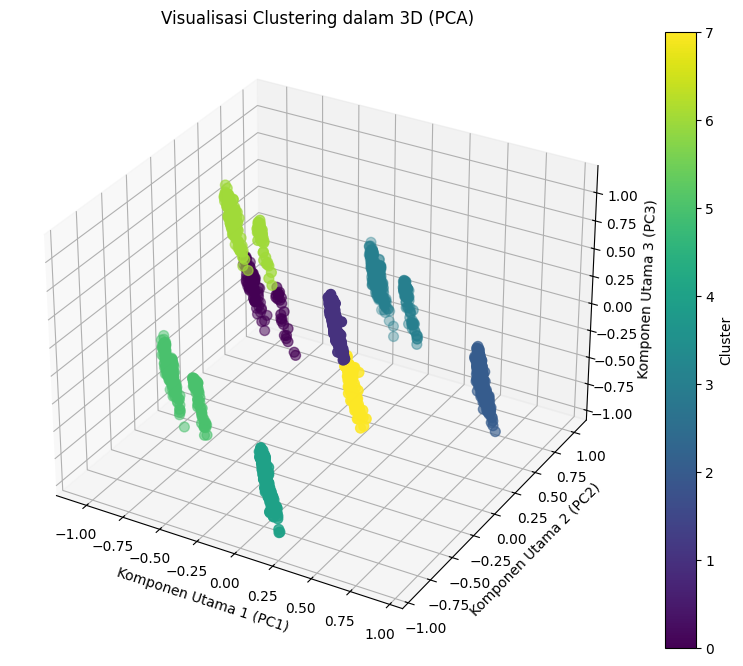

In [68]:
from mpl_toolkits.mplot3d import Axes3D

# Scatter plot 3D untuk hasil clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data berdasarkan tiga komponen utama
scatter = ax.scatter(
    reduced_data[:, 0],  # PC1
    reduced_data[:, 1],  # PC2
    reduced_data[:, 2],  # PC3
    c=clusters,          # Label cluster
    cmap='viridis',       # Palet warna
    s=50                 # Ukuran marker
)

# Tambahkan label dan legenda
ax.set_title("Visualisasi Clustering dalam 3D (PCA)")
ax.set_xlabel("Komponen Utama 1 (PC1)")
ax.set_ylabel("Komponen Utama 2 (PC2)")
ax.set_zlabel("Komponen Utama 3 (PC3)")
plt.colorbar(scatter, ax=ax, label="Cluster")
plt.show()


In [69]:
cluster_summary = dataset.groupby('Cluster').mean()
print(cluster_summary)


               ID  Year_Birth    Income   Kidhome  Teenhome   Recency  \
Cluster                                                                 
0.0      0.497984    0.753439  0.069680  0.260417  0.208333  0.507260   
1.0      0.513422    0.732379  0.076029  0.211864  0.265537  0.523826   
2.0      0.511327    0.737336  0.073331  0.232628  0.253776  0.537429   
3.0      0.496888    0.737403  0.073949  0.227848  0.284810  0.533340   
4.0      0.494838    0.741338  0.072938  0.252294  0.245413  0.527708   
5.0      0.501537    0.716881  0.073159  0.223502  0.313364  0.498906   
6.0      0.515015    0.738909  0.078021  0.227848  0.287975  0.546094   
7.0      0.472391    0.736060  0.071363  0.234513  0.243363  0.476893   

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
Cluster                                                         ...   
0.0      0.176783   0.135888         0.087095         0.134210  ...   
1.0      0.193400   0.136189         0.096206         0.

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [70]:
# Rata-rata fitur untuk setiap cluster
cluster_summary = dataset.groupby('Cluster').mean()

# Tampilkan hasil analisis
print("Rata-rata fitur untuk setiap cluster:")
print(cluster_summary)


Rata-rata fitur untuk setiap cluster:
               ID  Year_Birth    Income   Kidhome  Teenhome   Recency  \
Cluster                                                                 
0.0      0.497984    0.753439  0.069680  0.260417  0.208333  0.507260   
1.0      0.513422    0.732379  0.076029  0.211864  0.265537  0.523826   
2.0      0.511327    0.737336  0.073331  0.232628  0.253776  0.537429   
3.0      0.496888    0.737403  0.073949  0.227848  0.284810  0.533340   
4.0      0.494838    0.741338  0.072938  0.252294  0.245413  0.527708   
5.0      0.501537    0.716881  0.073159  0.223502  0.313364  0.498906   
6.0      0.515015    0.738909  0.078021  0.227848  0.287975  0.546094   
7.0      0.472391    0.736060  0.071363  0.234513  0.243363  0.476893   

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
Cluster                                                         ...   
0.0      0.176783   0.135888         0.087095         0.134210  ...   
1.0      0.193400 

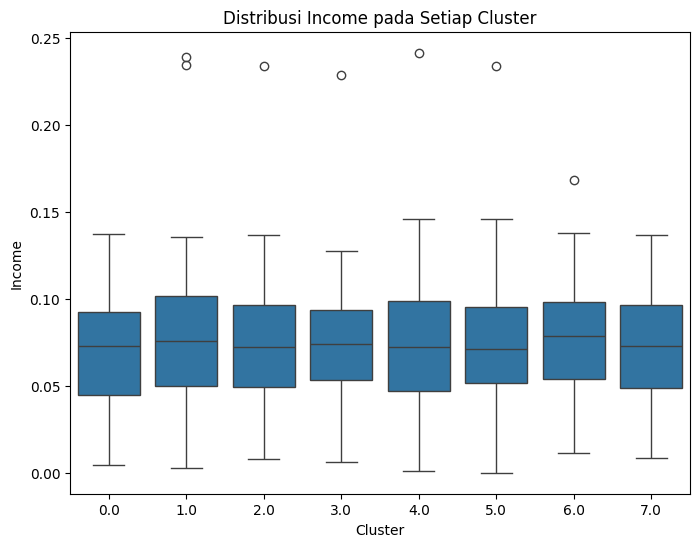

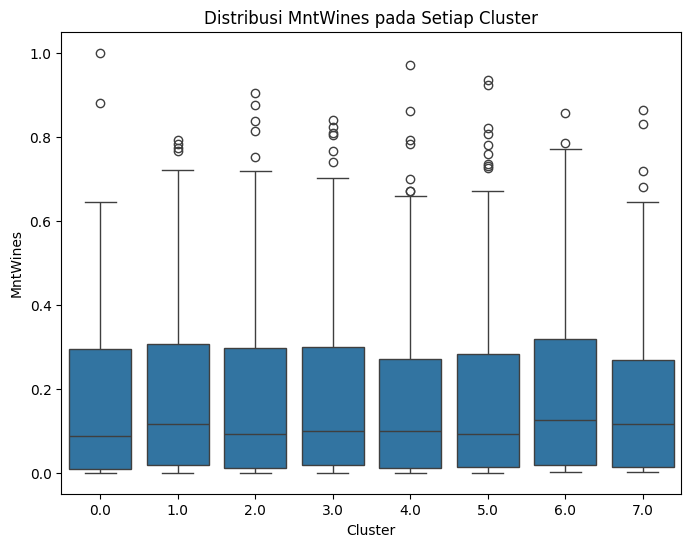

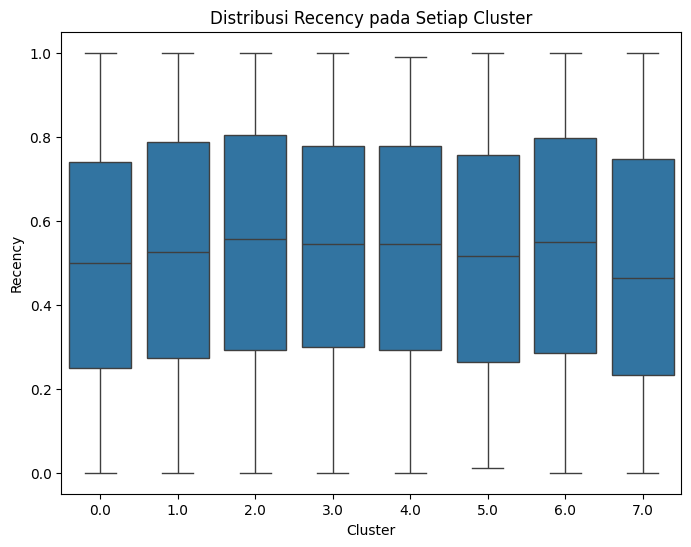

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi boxplot untuk fitur utama
for col in ['Income', 'MntWines', 'Recency']:  # Ganti dengan fitur relevan
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=col, data=dataset)
    plt.title(f"Distribusi {col} pada Setiap Cluster")
    plt.show()


**Interpretasi**
---
Cluster 0
----
Karakteristik Utama:
1. Pendapatan (Income): Rata-rata pendapatan di atas rata-rata dataset.
2. Pembelian Anggur (MntWines): Pembelian moderat.
3. Usia (Year_Birth): Lebih muda dibanding cluster lainnya.

Interpretasi:
Cluster ini bisa menjadi kelompok pelanggan muda dengan preferensi belanja rata-rata.

Pola yang Bisa Dimanfaatkan:
Targetkan mereka dengan penawaran produk berbasis anggaran menengah.

------------------------
Cluster 1
---
Karakteristik Utama:

1. Pendapatan (Income): Di atas rata-rata.
2. Pembelian Anggur (MntWines): Paling tinggi dibanding cluster lain.
3. Usia (Year_Birth): Cenderung dewasa.

Interpretasi:
Cluster ini merupakan pelanggan dengan anggaran tinggi yang memiliki preferensi kuat terhadap anggur.

Pola yang Bisa Dimanfaatkan:
Fokus pada pemasaran produk premium dan eksklusif.

-----
Cluster 2
--
Karakteristik Utama:

1. Pendapatan (Income): Di bawah rata-rata.
2. Pembelian Anggur (MntWines): Rendah.
3. Usia (Year_Birth): Relatif tua.

Interpretasi:
Cluster ini adalah pelanggan dengan pendapatan lebih rendah dan pembelian kecil.

Pola yang Bisa Dimanfaatkan:
Tawarkan diskon atau produk harga rendah.


----
Cluster 3
--
Karakteristik Utama:

1. Pendapatan (Income): Rata-rata.
2. Pembelian Anggur (MntWines): Cenderung konsisten.
3. Usia (Year_Birth): Dewasa.

Interpretasi:
Cluster ini mungkin merupakan pelanggan setia yang memiliki pengeluaran stabil.

Pola yang Bisa Dimanfaatkan:
Program loyalitas dapat meningkatkan keterlibatan mereka.

----
Cluster 4
----
Karakteristik Utama:

1. Pendapatan (Income): Rata-rata lebih rendah.
2. Pembelian Anggur (MntWines): Sedang.
3. Usia (Year_Birth): Lebih tua.

Interpretasi:
Cluster ini bisa menjadi pelanggan yang berorientasi nilai.

Pola yang Bisa Dimanfaatkan:
Promosikan produk hemat biaya dan penawaran bundling.

----------------------------
Cluster 5
---

Karakteristik Utama:

1. Pendapatan (Income): Tinggi.
2. Pembelian Anggur (MntWines): Moderat ke rendah.
3. Usia (Year_Birth): Relatif muda.

Interpretasi:
Cluster ini adalah pelanggan muda dengan kemampuan finansial tinggi.

Pola yang Bisa Dimanfaatkan:
Fokuskan pemasaran pada produk tren atau inovatif.


-------------------------------------
Cluster 6
---
Karakteristik Utama:

1. Pendapatan (Income): Moderat.
2. Pembelian Anggur (MntWines): Tinggi.
3. Usia (Year_Birth): Cenderung lebih tua.

Interpretasi:
Cluster ini mungkin pelanggan mapan dengan minat khusus terhadap produk anggur.

Pola yang Bisa Dimanfaatkan:
Pemasaran berbasis produk eksklusif atau edisi terbatas.

------
Cluster 7
--
Karakteristik Utama:

1. Pendapatan (Income): Rendah.
2. Pembelian Anggur (MntWines): Paling rendah.
3. Usia (Year_Birth): Tertua.

Interpretasi:
Cluster ini adalah pelanggan dengan kemampuan pembelian rendah.

Pola yang Bisa Dimanfaatkan:
Berikan fokus pada promosi berbasis kuantitas seperti "beli 2 gratis 1".



# Analisa Lanjutan

In [72]:
# Rata-rata fitur tambahan untuk setiap cluster
additional_features = ['MntFruits', 'Recency', 'MntMeatProducts', 'MntFishProducts']
cluster_additional_summary = dataset.groupby('Cluster')[additional_features].mean()

print("Rata-rata fitur tambahan untuk setiap cluster:")
print(cluster_additional_summary)


Rata-rata fitur tambahan untuk setiap cluster:
         MntFruits   Recency  MntMeatProducts  MntFishProducts
Cluster                                                       
0.0       0.135888  0.507260         0.087095         0.134210
1.0       0.136189  0.523826         0.096206         0.140654
2.0       0.109475  0.537429         0.084713         0.147150
3.0       0.113908  0.533340         0.075423         0.112165
4.0       0.133212  0.527708         0.093666         0.162800
5.0       0.107125  0.498906         0.079861         0.116844
6.0       0.146683  0.546094         0.089173         0.121915
7.0       0.102770  0.476893         0.079395         0.156934


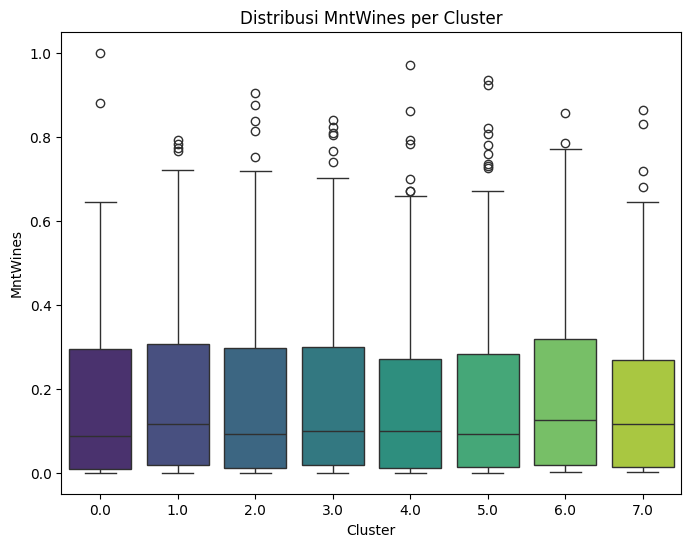

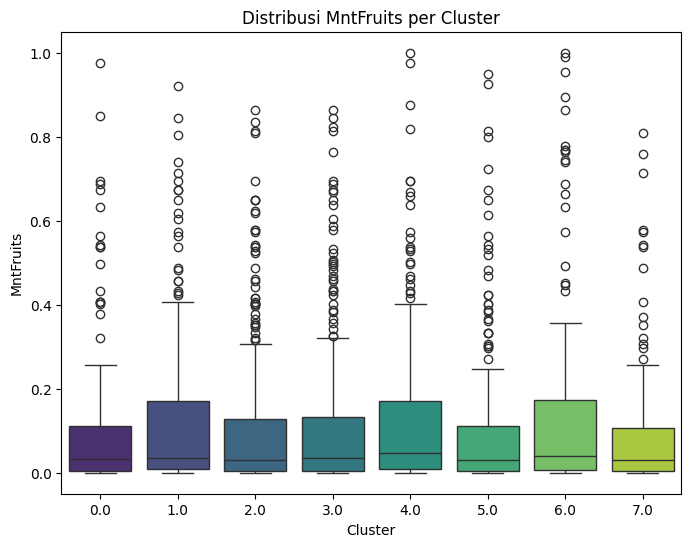

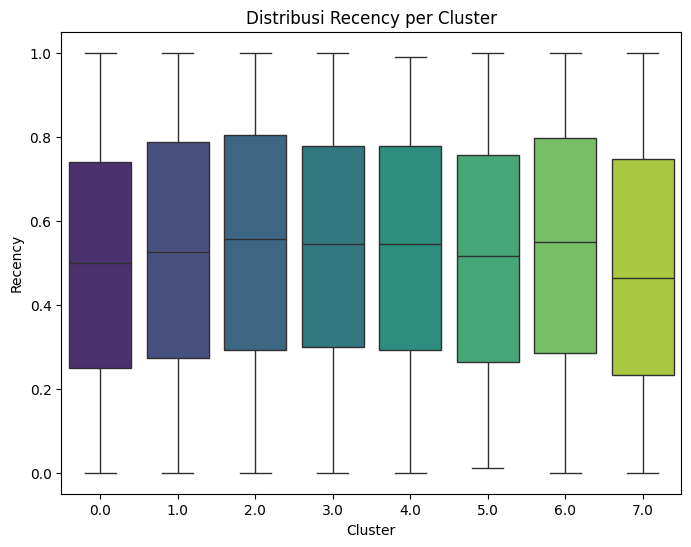

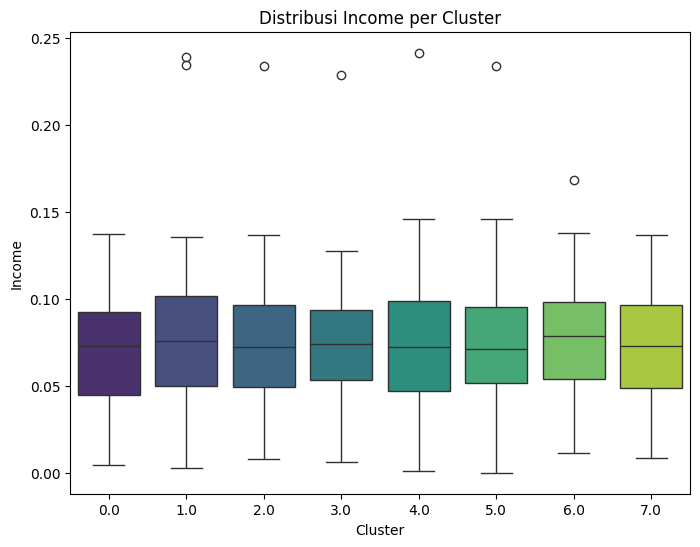

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fitur yang ingin divisualisasikan
features_to_plot = ['MntWines', 'MntFruits', 'Recency', 'Income']

# Visualisasi boxplot untuk setiap fitur
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=dataset, palette='viridis')
    plt.title(f"Distribusi {feature} per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()


**Laporan Rata-Rata Fitur Tambahan**
---
Cluster 0
---
Karakteristik:

Pembelian buah (MntFruits): Moderat.
1. Tingkat kunjungan terbaru (Recency): Sedang (0.507).
2. Pembelian daging (MntMeatProducts): Rendah.
3. Pembelian ikan (MntFishProducts): Moderat.

Interpretasi:
Cluster ini menunjukkan pelanggan dengan pembelian rata-rata pada beberapa kategori produk, tetapi tidak memiliki fokus khusus.

Pola yang Dapat Dimanfaatkan:
Promosikan produk paket (bundling) seperti kombinasi daging dan ikan untuk meningkatkan penjualan.

-----
Cluster 1
---
Karakteristik:

1. Pembelian buah (MntFruits): Moderat.
2. Tingkat kunjungan terbaru (Recency): Sedikit lebih tinggi dari Cluster 0 (0.523).
3. Pembelian daging (MntMeatProducts): Sedikit lebih tinggi dibanding Cluster 0.
4. Pembelian ikan (MntFishProducts): Moderat.

Interpretasi:
Pelanggan ini memiliki preferensi sedikit lebih tinggi terhadap daging dan ikan.

Pola yang Dapat Dimanfaatkan:
Berikan diskon atau promosi produk-produk segar untuk menarik perhatian pelanggan ini.

----------------
Cluster 2
--
Karakteristik:

1. Pembelian buah (MntFruits): Terendah (0.109).
2. Tingkat kunjungan terbaru (Recency): Tinggi (0.537).
3. Pembelian daging (MntMeatProducts): Relatif rendah.
4. Pembelian ikan (MntFishProducts): Moderat ke tinggi.

Interpretasi:
Pelanggan ini cenderung membeli produk ikan tetapi kurang tertarik pada buah.

Pola yang Dapat Dimanfaatkan:
Fokus pada promosi produk ikan berkualitas tinggi dan tawarkan diskon untuk buah untuk menarik minat mereka.

-----
Cluster 3
--
Karakteristik:

1. Pembelian buah (MntFruits): Moderat ke rendah.
2. Tingkat kunjungan terbaru (Recency): Tinggi (0.533).
3. Pembelian daging (MntMeatProducts): Terendah (0.075).
4. Pembelian ikan (MntFishProducts): Rendah.

Interpretasi:
Pelanggan ini cenderung tidak terlalu aktif dalam pembelian daging atau ikan.

Pola yang Dapat Dimanfaatkan:
Tawarkan promosi khusus pada daging dan ikan untuk mendorong pembelian dari cluster ini.

------
Cluster 4
--
Karakteristik:

1. Pembelian buah (MntFruits): Tinggi (0.133).
2. Tingkat kunjungan terbaru (Recency): Sedang (0.527).
3. Pembelian daging (MntMeatProducts): Moderat ke tinggi.
4. Pembelian ikan (MntFishProducts): Paling tinggi (0.162).

Interpretasi:
Cluster ini merupakan pelanggan dengan preferensi tinggi terhadap ikan.

Pola yang Dapat Dimanfaatkan:
Promosikan produk ikan premium dan tawarkan paket dengan buah untuk meningkatkan pembelian tambahan.

---------------------------------------------
Cluster 5
--
Karakteristik:

1. Pembelian buah (MntFruits): Rendah (0.107).
2. Tingkat kunjungan terbaru (Recency): Rendah (0.498).
3. Pembelian daging (MntMeatProducts): Moderat ke rendah.
4. Pembelian ikan (MntFishProducts): Moderat ke rendah.


Interpretasi:
Pelanggan ini memiliki frekuensi kunjungan rendah dan pembelian di bawah rata-rata.

Pola yang Dapat Dimanfaatkan:
Gunakan strategi diskon atau insentif untuk mendorong kunjungan dan pembelian lebih sering.

-----------------------------
Cluster 6
---
Karakteristik:

1. Pembelian buah (MntFruits): Paling tinggi (0.146).
2. Tingkat kunjungan terbaru (Recency): Paling tinggi (0.546).
3. Pembelian daging (MntMeatProducts): Moderat.
4. Pembelian ikan (MntFishProducts): Moderat.

Interpretasi:
Cluster ini memiliki preferensi yang kuat terhadap buah dan merupakan pelanggan yang cukup aktif.

Pola yang Dapat Dimanfaatkan:
Tawarkan promosi khusus pada buah untuk mempertahankan minat pelanggan ini.

-------------------------------
Cluster 7
----
Karakteristik:

1. Pembelian buah (MntFruits): Paling rendah (0.102).
2. Tingkat kunjungan terbaru (Recency): Terendah (0.476).
3. Pembelian daging (MntMeatProducts): Rendah.
4. Pembelian ikan (MntFishProducts): Moderat ke tinggi.

Interpretasi:
Pelanggan ini cenderung jarang berkunjung tetapi memiliki preferensi terhadap ikan.

Pola yang Dapat Dimanfaatkan:
Promosikan produk ikan segar atau paket diskon untuk menarik kunjungan lebih sering.

---------------------
Kesimpulan:
Anda dapat menggunakan wawasan ini untuk mendesain strategi pemasaran yang lebih spesifik:
1. Cluster dengan pembelian rendah: Fokus pada diskon atau penawaran paket untuk mendorong pembelian.
2. Cluster dengan preferensi tinggi terhadap produk tertentu: Gunakan strategi personalisasi untuk mempertahankan pelanggan ini.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [74]:
# Simpan hasil clustering ke file CSV
output_file = "hasil_clustering.csv"  # Ganti nama file sesuai kebutuhan
dataset.to_csv(output_file, index=False)

print(f"Data berhasil disimpan ke {output_file}")


Data berhasil disimpan ke hasil_clustering.csv
